### Processing data

In [1]:
import re

import pandas as pd
import nltk

In [2]:
# read in comments
comments = pd.read_csv('./data/raw/Comments.csv')

In [5]:
sample = comments.Reply.iloc[9]
sample

'"How about a pilot without the plane?"\n\nIron-Man, confirmed.'

In [6]:
re.sub(r'\(?http\S+', '', sample)

'"How about a pilot without the plane?"\n\nIron-Man, confirmed.'

In [7]:
word_tokenized = nltk.word_tokenize(sample)
word_tokenized

['``',
 'How',
 'about',
 'a',
 'pilot',
 'without',
 'the',
 'plane',
 '?',
 "''",
 'Iron-Man',
 ',',
 'confirmed',
 '.']

In [8]:
' '.join(word_tokenized)

"`` How about a pilot without the plane ? '' Iron-Man , confirmed ."

**Bigrams**

In [9]:
sample = ['more', 'is', 'said', 'than', 'done', 'is', 'said', 'than']

In [11]:
from nltk.collocations import *

In [12]:
all_text = comments.iloc[:10000,:].Reply.str.cat(sep='. ')

In [13]:
all_text = nltk.word_tokenize(all_text)

In [14]:
def common_bigrams(tokenized_text, min_freq, top_n):
    bigram_measures = nltk.collocations.BigramAssocMeasures()
    finder = BigramCollocationFinder.from_words(tokenized_text)
    finder.apply_freq_filter(min_freq) 
    finder.nbest(bigram_measures.pmi, top_n)
    return finder.nbest(bigram_measures.pmi, top_n)

print(common_bigrams(all_text, 10, 10))

[('Letters|More', 'Letters|'), ('|Fewer', 'Letters|More'), ('fossil', 'fuels'), ('vast', 'majority'), ('Black', 'Panther'), ('Mario', 'Kart'), ('social', 'media'), ('Of', 'course'), ('solar', 'panels'), ('South', 'Africa')]


In [16]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

sample = comments.iloc[:10000,:].Reply.str.cat(sep='. ')

In [17]:
import random
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(1, 20)

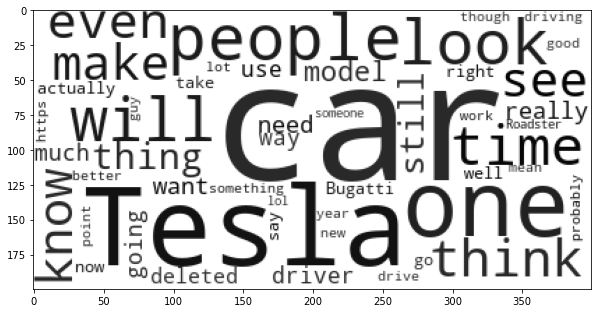

In [18]:
stp = STOPWORDS.copy()
wc = WordCloud(background_color="white", max_words=50,  stopwords=stp)
# generate word cloud
wc.generate(sample)

plt.figure(figsize=(10,20))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3))
plt.show()

### Vader package

In [20]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer, VaderConstants

sid = SentimentIntensityAnalyzer()

In [25]:
df = comments[comments.Key<101]
df.shape

(70142, 4)

In [26]:
df.Reply = df.Reply.apply(lambda x: re.sub(r'\(?http\S+', '', x))
df.Reply = df.Reply.apply(lambda x: ' '.join(nltk.word_tokenize(x)))


In [27]:
df[['neg','neu','pos','compound']] = df.Reply.apply(lambda x: pd.Series(sid.polarity_scores(x)))


In [28]:
df.head(3)

,Reply,Upvote,Time,Key,neg,neu,pos,compound
0,All we need now is humanless bodies,964,2018-01-30 11:19:01,1,0.000,1.000,0.000,0.0000
1,For a moment I read careless driver . Would ha...,3982,2018-01-30 10:35:31,1,0.195,0.547,0.258,0.2023
2,Elon 's Twitter feed has been hilarious over t...,1765,2018-01-30 11:21:32,1,0.083,0.833,0.083,0.0000


### Textblob package

In [50]:
from textblob.sentiments import NaiveBayesAnalyzer, PatternAnalyzer
from textblob import Blobber
tba = Blobber(analyzer=NaiveBayesAnalyzer())

In [51]:
df = comments[comments.Key<101]


In [52]:
df.Reply = df.Reply.apply(lambda x: re.sub(r'\(?http\S+', '', x))
df.Reply = df.Reply.apply(lambda x: ' '.join(nltk.word_tokenize(x)))


In [53]:
df[['Classification','positive','negative']] = df.Reply.apply(lambda x: pd.Series({'Classification':tba(x).sentiment[0],
                                                                        'positive':tba(x).sentiment[1],
                                                                        'negative':tba(x).sentiment[2]}))


In [54]:
df.head(3)

,Reply,Upvote,Time,Key,Classification,positive,negative
0,All we need now is humanless bodies,964,2018-01-30 11:19:01,1,pos,0.514741,0.485259
1,For a moment I read careless driver . Would ha...,3982,2018-01-30 10:35:31,1,pos,0.521948,0.478052
2,Elon 's Twitter feed has been hilarious over t...,1765,2018-01-30 11:21:32,1,pos,0.738500,0.261500


In [56]:
comments.dropna(subset=['Reply'], inplace=True)

In [58]:
# remove punctuation
comments.Reply = comments.Reply.apply(lambda x: re.sub(r'[^\w\s]', '', x) )

In [62]:
# remove stopwords
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
comments.Reply = comments.Reply.apply(lambda x: ' '.join([word for word in nltk.word_tokenize(x) if word.lower() not in stopwords]))

In [63]:
# remove links
comments.Reply = comments.Reply.apply(lambda x: re.sub(r'\(?http\S+', '', x))

In [64]:
# stemming and lemmatization
from nltk.stem import PorterStemmer
porter_stemmer = PorterStemmer()

In [65]:
text = nltk.word_tokenize('women run running runs ran')
stemmed = [porter_stemmer.stem(word) for word in text]
stemmed

['women', 'run', 'run', 'run', 'ran']

### Training naive bayes sentiment classifier

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn import metrics

In [68]:
vectorizer = CountVectorizer()

In [69]:
comments.dropna(subset=['Reply'], inplace=True)
X = vectorizer.fit_transform(comments.Reply)

In [72]:
# instantiate multinomial naive bayes model
nb = MultinomialNB()

nb.fit(X, data.sentiment)

NameError: name 'data' is not defined